<a href="https://colab.research.google.com/github/Jeremy-22/Red-Neuronal/blob/main/Red_Densa_Secuencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00


In [2]:
import mlflow
mlflow.tensorflow.autolog()

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, RMSprop

In [4]:
dataset=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [29]:
(x_train, y_train),(x_test, y_test) = dataset

In [35]:
x_trainv = x_train.reshape(60000, 784) #redimensionamos los datos a una matriz con 60000 filas  y cada imagen se convertirá en un vector unidimensional de longitud 784
x_testv  = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype("float32")
x_testv  = x_testv.astype("float32")
x_trainv /= 255
x_testv  /=255

In [36]:
num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

In [37]:
model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [38]:
optimizer = keras.optimizers.SGD(learning_rate=0.3, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [39]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=10,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 05:43:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '53eb814e7504409fb8f47075767d8e18', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3025 - accuracy: 0.9081 - val_loss: 0.1756 - val_accuracy: 0.9448
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1416 - accuracy: 0.9578 - val_loss: 0.1246 - val_accuracy: 0.9619
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1049 - accuracy: 0.9692 - val_loss: 0.1081 - val_accuracy: 0.9659
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0859 - accuracy: 0.9748 - val_loss: 0.0989 - val_accuracy: 0.9699
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.0962 - val_accuracy: 0.9701
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0588 - accuracy: 0.9822 - val_loss: 0.0860 - val_accuracy: 0.9733
Epoch 

2024/02/15 05:46:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [40]:
import matplotlib.pyplot as plt

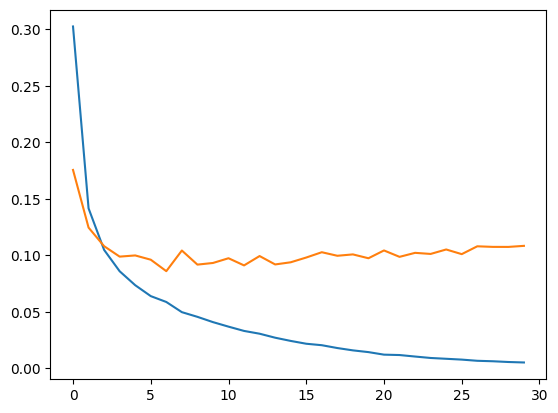

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

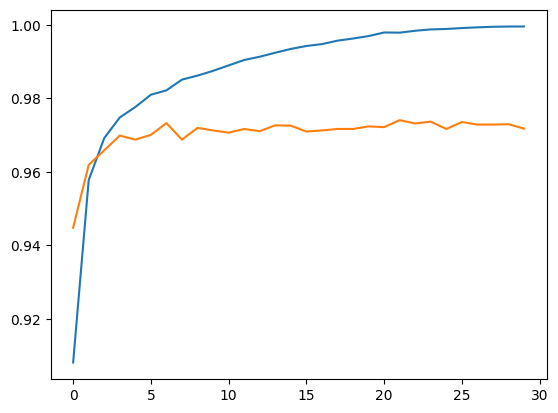

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [43]:
model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
